# Forest Classifier 

Using the dataset provide by Jock A. Blackard and Colorado State University (downloaded in the UCI machine learning repository. link below) to build a efficient classifier of the differents cover types.

In [2]:
# Basic Libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

# Machine Learning Libraries 

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV



## Data Exploration

Fortunately the dataset was already organaized and clean so the exploratory analysis will be a lot easier.

In [ ]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz'

In [3]:
data = pd.read_csv('covtype.data', names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type'])

In [8]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [11]:
# Looking for null data in the columns
for col in data.columns:
    print(col, data.loc[:,col].isnull().sum())

Elevation 0
Aspect 0
Slope 0
Horizontal_Distance_To_Hydrology 0
Vertical_Distance_To_Hydrology 0
Horizontal_Distance_To_Roadways 0
Hillshade_9am 0
Hillshade_Noon 0
Hillshade_3pm 0
Horizontal_Distance_To_Fire_Points 0
Wilderness_Area1 0
Wilderness_Area2 0
Wilderness_Area3 0
Wilderness_Area4 0
Soil_Type1 0
Soil_Type2 0
Soil_Type3 0
Soil_Type4 0
Soil_Type5 0
Soil_Type6 0
Soil_Type7 0
Soil_Type8 0
Soil_Type9 0
Soil_Type10 0
Soil_Type11 0
Soil_Type12 0
Soil_Type13 0
Soil_Type14 0
Soil_Type15 0
Soil_Type16 0
Soil_Type17 0
Soil_Type18 0
Soil_Type19 0
Soil_Type20 0
Soil_Type21 0
Soil_Type22 0
Soil_Type23 0
Soil_Type24 0
Soil_Type25 0
Soil_Type26 0
Soil_Type27 0
Soil_Type28 0
Soil_Type29 0
Soil_Type30 0
Soil_Type31 0
Soil_Type32 0
Soil_Type33 0
Soil_Type34 0
Soil_Type35 0
Soil_Type36 0
Soil_Type37 0
Soil_Type38 0
Soil_Type39 0
Soil_Type40 0
Cover_Type 0


In the web you can find all the description of each feature. Resuming a little the first 10 columns are quantitative features like geometrical apparence of the trees group and a type of "location".

In [4]:
nonbinary_data = data.iloc[:,:10]
nonbinary_list = list(nonbinary_data)
print(nonbinary_list)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [13]:
nonbinary_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


The other columns provide the categorical information, the soil and the wilderness of the area. But a big point of this dataset is that all the information is indirect 

In [5]:
binary_data = data.iloc[:,10:-1] 
binary_list = list(binary_data)
print(binary_data.columns)

Index(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')


In [15]:
# As the information it's categorical, only cares the mean and standart deviation
binary_data.describe().loc[['mean','std'], :]

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
mean,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791


With all the histograms of the quantitative features for each cover type it can see how some of the features by himself are already giving a characteristic that defined the cover like the elevation or the aspect.

Histograms of the non-binary variables, cover type 1


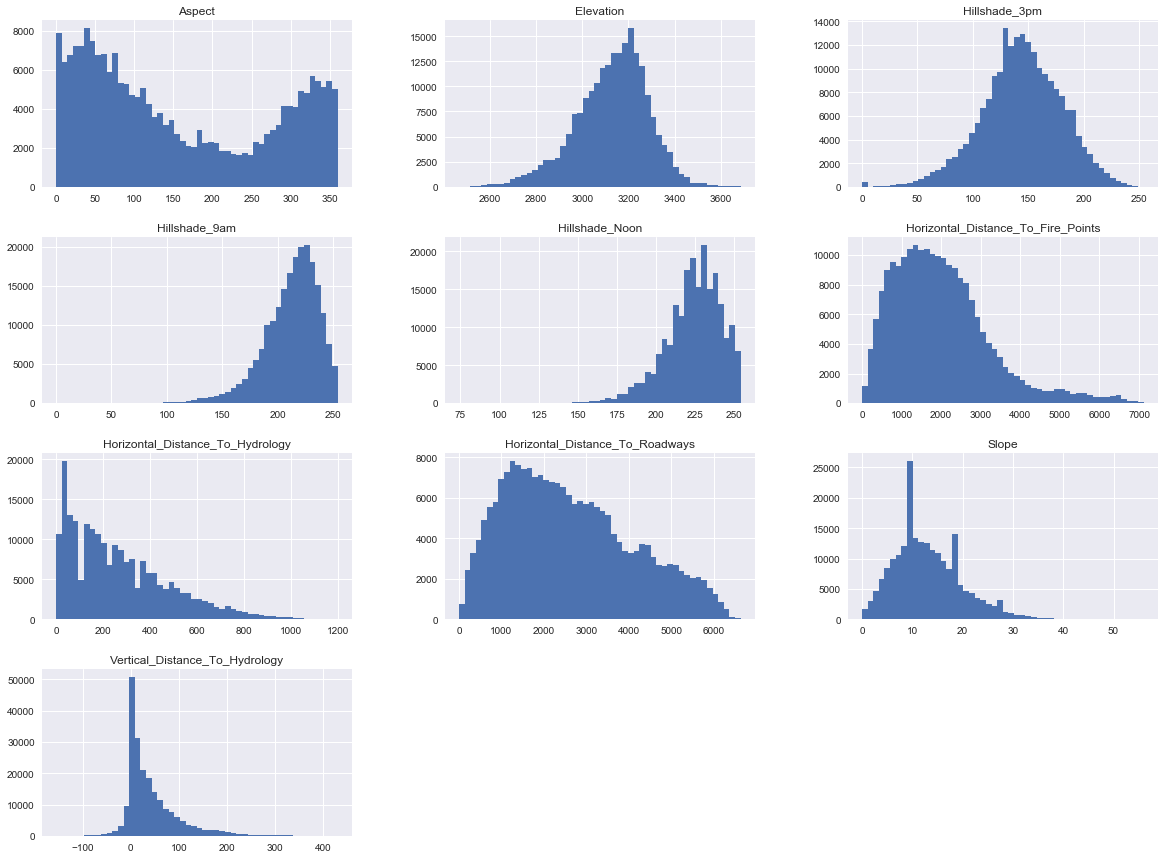

Histograms of the non-binary variables, cover type 2


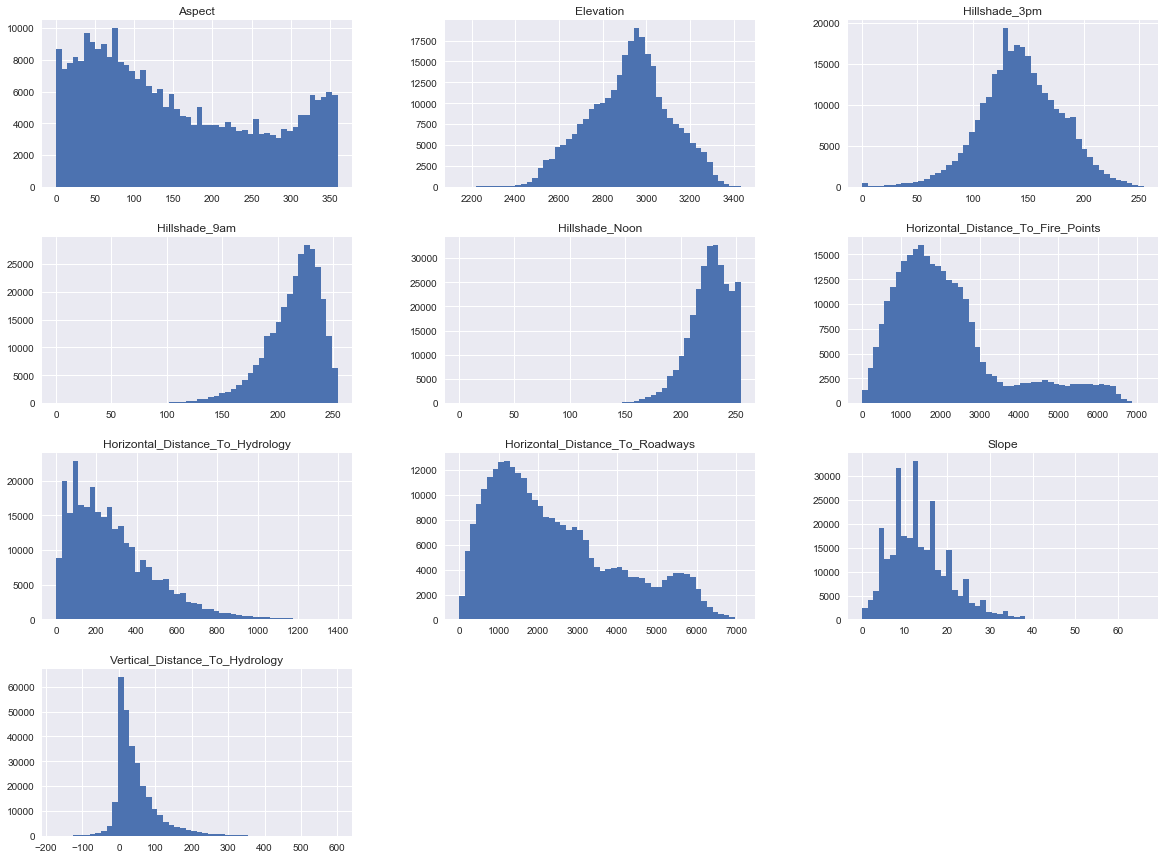

Histograms of the non-binary variables, cover type 3


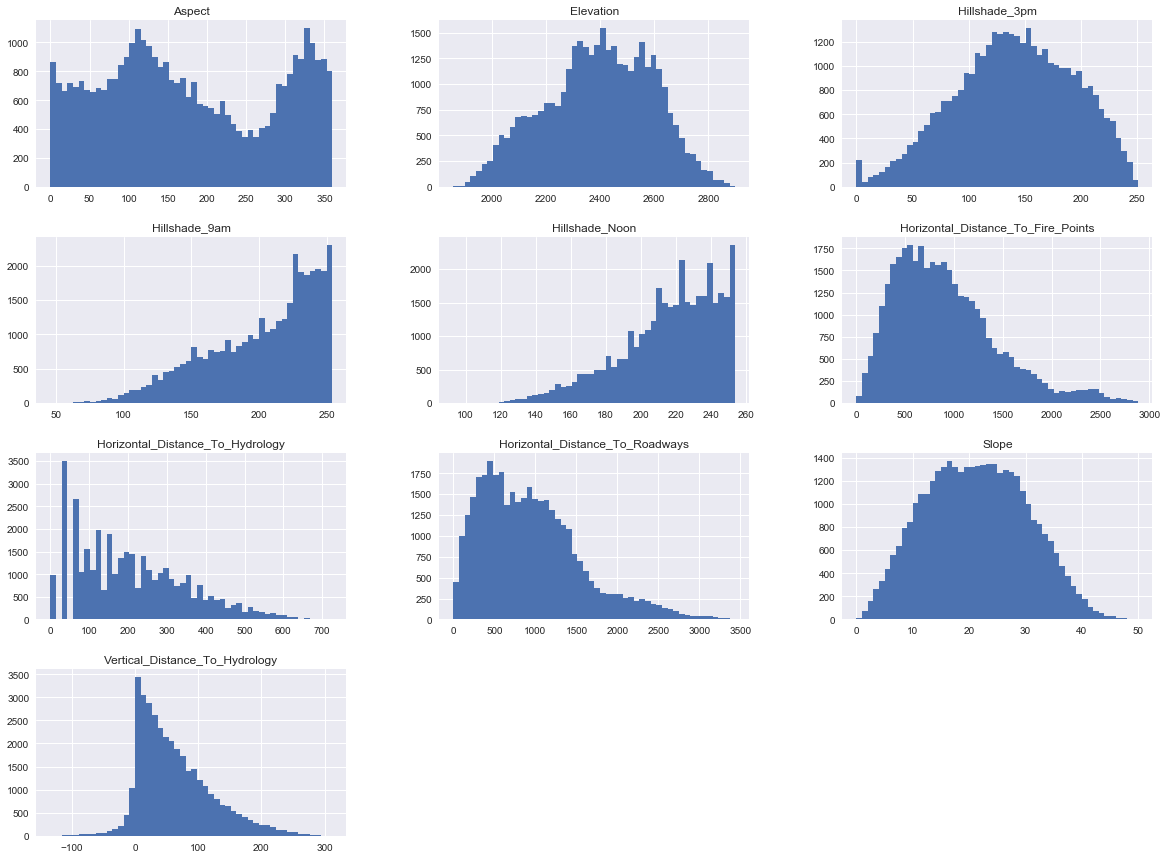

Histograms of the non-binary variables, cover type 4


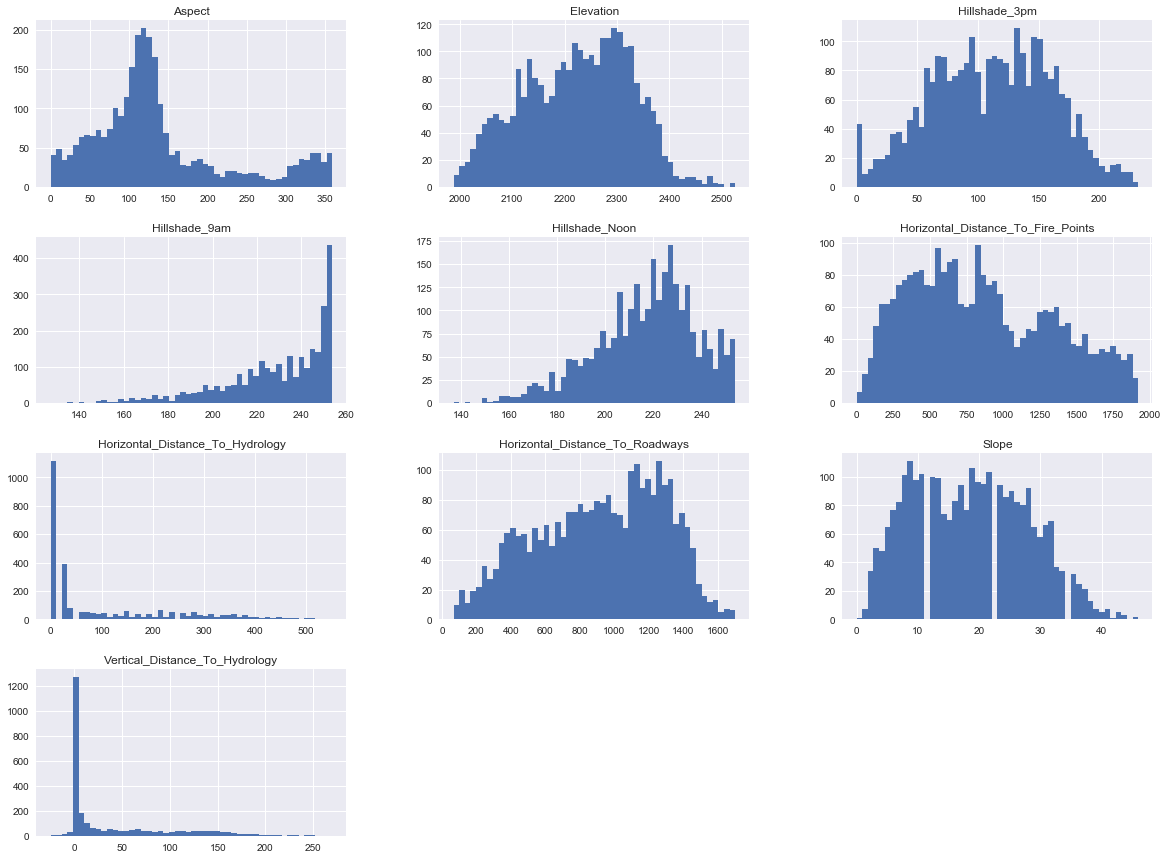

Histograms of the non-binary variables, cover type 5


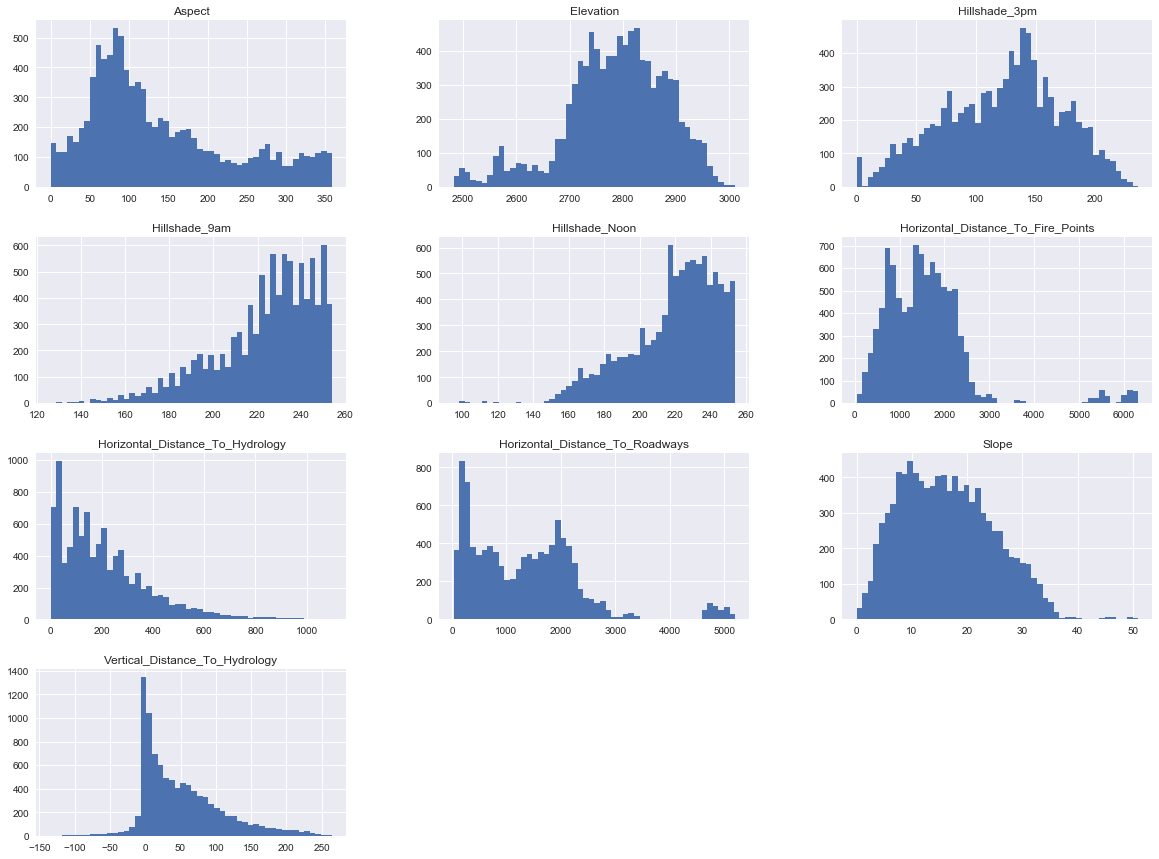

Histograms of the non-binary variables, cover type 6


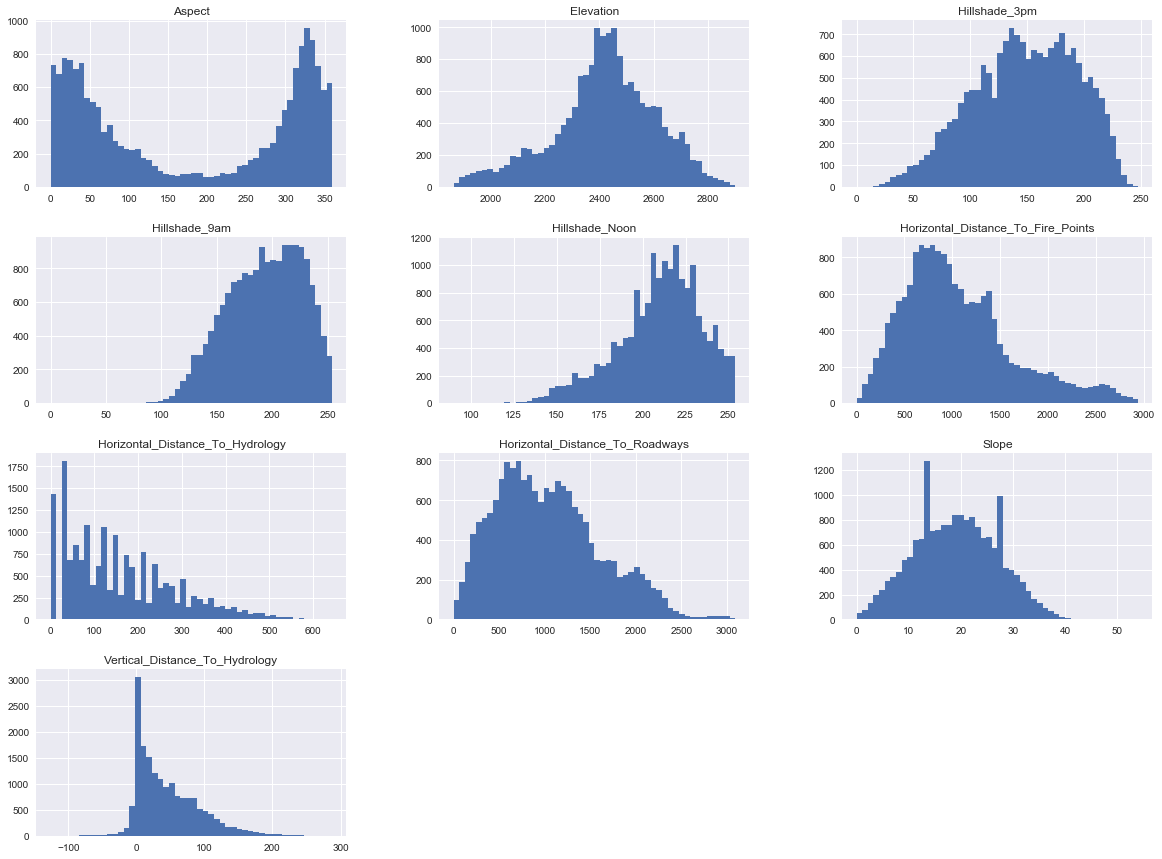

Histograms of the non-binary variables, cover type 7


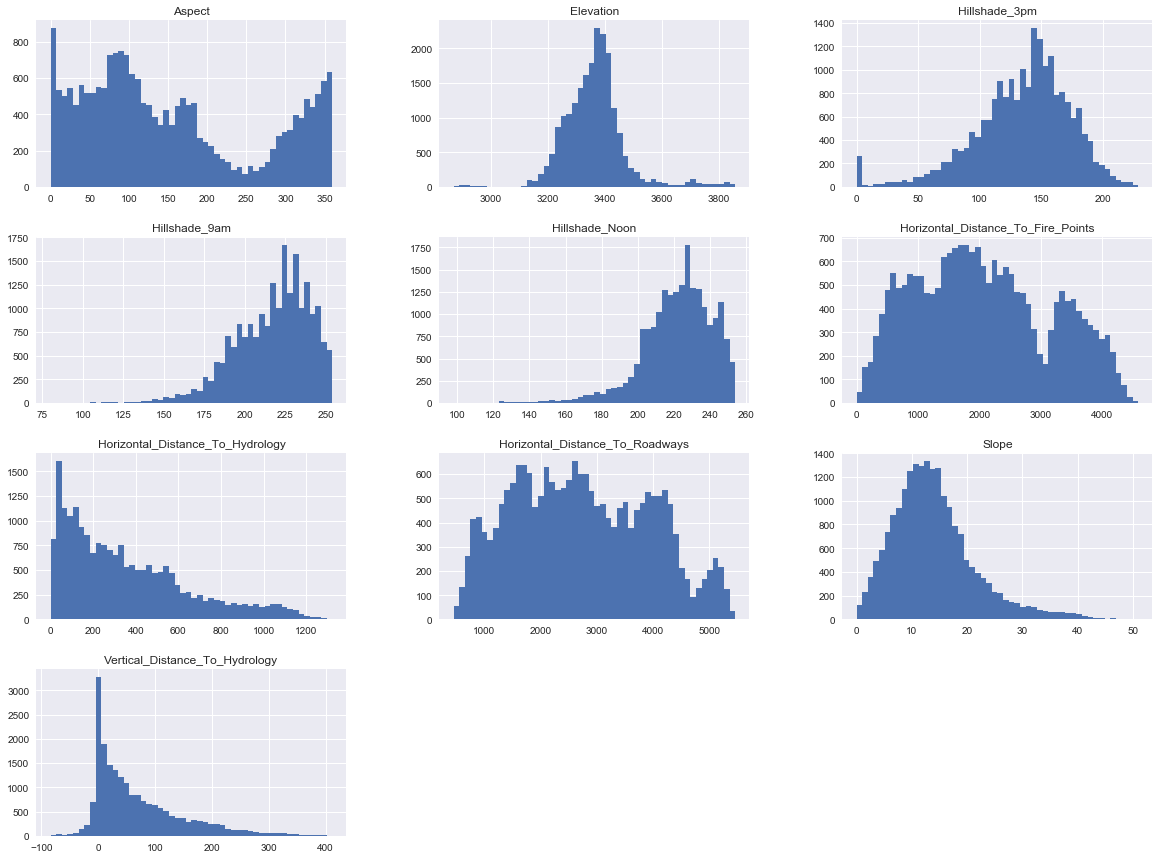

In [24]:
# Histogramns of the non-binary variables 
# Cover-Type visualization
plt.style.use('seaborn')
train_nonbinary = nonbinary_data.join(data.loc[:,'Cover_Type'])
for Type in range(1,8):
    data_cover = train_nonbinary.loc[train_nonbinary['Cover_Type'] == Type]
    data_cover = data_cover.drop(['Cover_Type'], axis = 1)
    print('Histograms of the non-binary variables, cover type', Type)
    data_cover.hist( bins = 50, figsize = (20, 15))
    plt.show()

In [25]:
# Distribution of soils quantity and Wilderness area in each Cover type
train_binary = binary_data.join(data.loc[:,'Cover_Type'])
train_binary = train_binary.groupby(['Cover_Type']).sum()
train_binary.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,105717,18595,87528,0,0,0,0,182,0,0,...,11863,21358,18148,94,931,14,0,8729,7882,4826
2,146197,8985,125093,3026,0,852,1191,3251,0,912,...,13209,29556,25308,1431,12,42,0,740,358,332
3,0,0,14300,21454,2101,4991,2411,7501,967,3993,...,0,106,5,0,0,0,0,0,0,0
4,0,0,0,2747,178,115,1018,168,48,320,...,0,0,0,0,0,0,0,0,0,0
5,3781,0,5712,0,0,264,0,585,0,0,...,309,460,518,20,0,0,0,0,0,0


Similar to the first columns the graph represent the types of wilderness for each cover type, also in the table above it can see for the soils type but making a graph for each one of it wouldnt contribute much.

It can see the amount of cover types 1 and 2, plus apparently the wilderness its very characteristic to classify the cover type. 

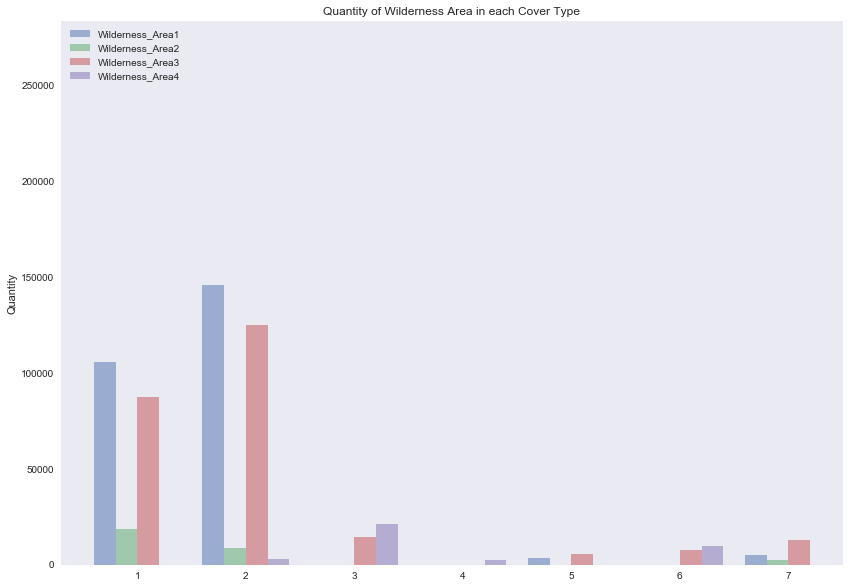

In [26]:
# Value of the X label
labels = train_binary.index
x = np.arange(len(labels))
width = 0.2

# Set the plot size and names 
fig, ax = plt.subplots(figsize=(14,10))
ax.set_ylabel('Quantity')
ax.set_title('Quantity of Wilderness Area in each Cover Type')
ax.set_xticklabels(labels)

# loop to plot each one of the desire columns 
i = 0
for col in train_binary.columns[:4]:
    plt.bar([p +width*i for p in x], train_binary[col], width, alpha = 0.5, label = labels)
    i += 1

    
# Set the location of the X labels
ax.set_xticks([p + 1.5 * width for p in x])

# Limits of the X and Y axis 
plt.xlim(min(x)-width*2, max(x)+width*4)
plt.ylim([0, max(train_binary['Wilderness_Area1'] + train_binary['Wilderness_Area2'] + train_binary['Wilderness_Area3'] + 1.1*train_binary['Wilderness_Area4'])] )

# Legend of the plot
plt.legend(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], loc='upper left')
plt.grid()
plt.show()


In [27]:
# Percentage of each type of soil per cover type
resume = []
for cover in range(1,8):
    val =[]
    for col in train_binary.columns[4:]:
        total_col = train_binary.loc[:,col].sum()
        percentage = train_binary.loc[cover,col]/total_col
        if percentage >= 0.01:
            val.append([cover, col, percentage])
    resume.append(val)
            

In [28]:
# Number of differents types of soils for each cover type 
for i in range(7):
    print(i + 1, len(resume[i]))

1 31
2 34
3 11
4 9
5 15
6 15
7 12


Seeking for correlation between the quantitative feautures I plotted the correlations matrix and only reflects a few relevant correlations but it seems pretty obvious, mostly of them only reflects the relation between the aspect and slope with the shades.

(10, 0)

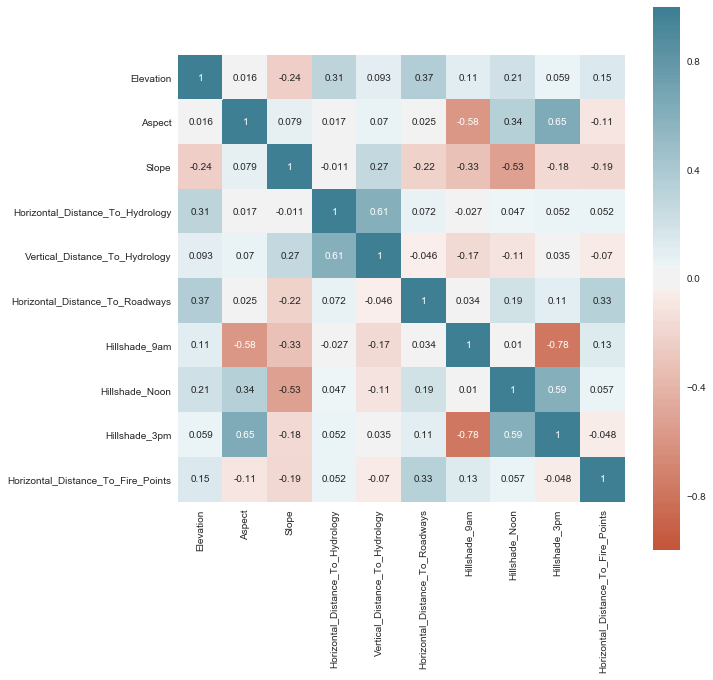

In [29]:
correlations = train_nonbinary.drop(['Cover_Type'],axis =1)
# to see how the variables interact with eachother,the data will Standarized
names_nonbinary = correlations.columns
scaler = preprocessing.StandardScaler() 
#fit the data
scaled_nonbinary = scaler.fit_transform(correlations)
scaled_nonbinary = pd.DataFrame(scaled_nonbinary, columns = names_nonbinary)
# covariance matrix
plt.figure(figsize = (10,10))
cov_vals = scaled_nonbinary.cov()
heatM = sns.heatmap(cov_vals, vmin = -1, vmax = 1,center = 0, cmap = sns.diverging_palette(20, 220, n = 200),  square = True, annot = True)
heatM.set_ylim([10,0])

As I write before the elevation its a very characteristic feature so is relevant to plot a violin chart for it, to check if its right to say that or is a preconception.

Text(0.5, 1.0, 'Cover Types Elevation')

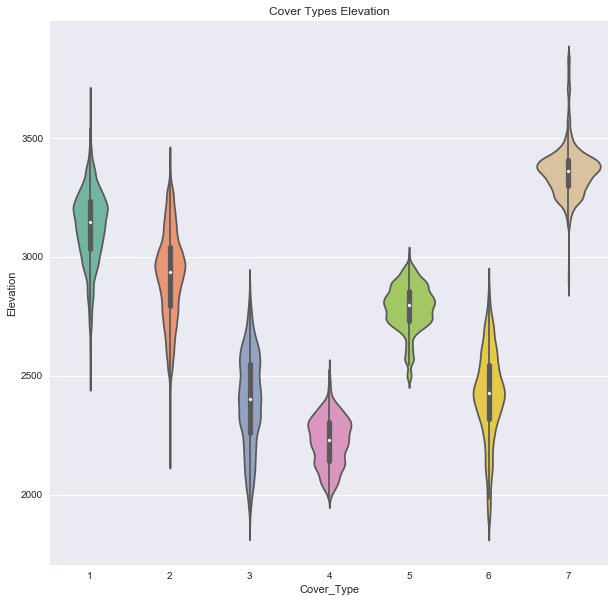

In [30]:
# Print the violin charts of the Elevation
# Caracteristics of elevation 
plt.figure(figsize = (10,10))
plt.style.use('seaborn')
violin_elevation =sns.violinplot( x = 'Cover_Type', y = 'Elevation', data = train_nonbinary, palette = 'Set2')
violin_elevation.set_title('Cover Types Elevation')

Its clear from the begining that this is a classification problem so I choose 3 models to prove: Logistic regression, Random Forest and neural networks. Initially I was to prove the Support vector machine but its so demanding computationally (at least for this current pc) that I had to left it behind.

First of all I defined a simple pipeline to trate the numerical data and the categorical data, then split it into train and test.

In [6]:
# Defining a class for select columns (Hands on Machine Learning with Scikit-Learn and Tensroflow)
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attribute_names = attributes_names
    def fit(self, X, y = None):
        return self 
    def transform(self, X):
        return X[self.attribute_names].values
        

In [7]:
# As the data was clean, the pipeline it's very simple
# 1- Select the non-binary features and scalated them.
# 2- Select the binary features
numeric_pipeline = Pipeline([
                               ('selector', DataFrameSelector(nonbinary_list)), 
                               ('std_scaler', preprocessing.StandardScaler()), ])    # Normalize the data 

categorical_pipeline = Pipeline ([('selector', DataFrameSelector(binary_list))])

# 3 - Merge the sets of infromation into one 
total_pipeline = FeatureUnion( transformer_list = [ ('numeric_pipeline', numeric_pipeline),
                                                     ('categorical_pipeline', categorical_pipeline)
                                                  ])

In [8]:
def param_search(model, params, data, obj_data):
    '''Simple function to use grid search and select the best estimator of the specified possibilities 
        model: Machine Learning model
        params: Especified parameters
        data: Train data
        obj_data: Objective information
        print: The score value (f1_macro) and the parameters of it 
        return : The best estimator '''
  
    grid_search = GridSearchCV(model, params, cv = 5, scoring = 'f1_macro')
    grid_search.fit(data, obj_data)
    for score, param in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
        print(score, param)
    return grid_search.best_params_

In [9]:
def rand_param_search(model, params, data, obj_data, N):
    '''Simple function to use random search and select the best estimator 
        model: Machine Learning model
        params: Especified parameters
        data: Train data
        obj_data: Objective information
        N: Number of iterations
        print: The score value (f1_macro) and the parameters of it 
        return : The best estimator '''
    rand_search = RandomizedSearchCV(model, params, cv = 5,  n_iter = N, scoring = 'f1_macro')
    rand_search.fit(data, obj_data)
    for score, param in zip(rand_search.cv_results_['mean_test_score'], rand_search.cv_results_['params']):
        print(score, param)
    return rand_search.best_params_
    
    

In [14]:
# Split the Data in train and test set
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 3)
# Correct Data (pipeline)
scaled_trainData = total_pipeline.fit_transform(data_train)
label_data = data_train.loc[:,'Cover_Type']
scaled_testData = total_pipeline.fit_transform(data_test)
label_dataTest = data_test.loc[:,'Cover_Type']

## Proving the classifier models 

As I mentioned before handle all the information with this current pc is a little heavy so I had to choose finding the right parameters using a random search as follow. (I left the previous code using grid search but it spend 12 hours to calculate 5 combinations with a cross validation of 5, in logistic regression).  

In [212]:
log_reg = LogisticRegression()
#params_log = {'C': [40, 60], 'penalty': ['l2'], 'max_iter': [5000], 'solver': ['sag', 'newton-cg']}

In [215]:
#best_log = param_search(log_reg, params_log, scaled_trainData, label_data)

In [214]:
params_log_rand = {'C': list(range(1,200)), 'penalty': ['l2'], 'max_iter': [10000], 'solver': ['sag', 'newton-cg']}
best_rand_log = rand_param_search(log_reg, params_log_rand, scaled_trainData, label_data, 5)

D:\Users\Andres\Miniconda3\envs\MLearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Users\Andres\Miniconda3\envs\MLearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Users\Andres\Miniconda3\envs\MLearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Users\Andres\Miniconda3\envs\MLearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  

0.4827161158816011 {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 10000, 'C': 154}
0.4827375032539741 {'solver': 'sag', 'penalty': 'l2', 'max_iter': 10000, 'C': 186}
0.48274126362597475 {'solver': 'sag', 'penalty': 'l2', 'max_iter': 10000, 'C': 112}
0.4826331825768284 {'solver': 'sag', 'penalty': 'l2', 'max_iter': 10000, 'C': 56}
0.48272374357142284 {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 10000, 'C': 70}


In [217]:
random_forest = RandomForestClassifier()
#param_forest = { 'n_estimators':[60, 80, 90, 100], 'bootstrap': [False, True], 'max_features':[8,9,10,12]}

In [67]:
#best_forest = param_search(random_forest, param_forest, scaled_trainData, label_data)

In [218]:
param_forest_rand = { 'n_estimators':list(range(30,200)), 'bootstrap': [False, True], 'max_features':[8,9,10,12]}
best_forest_rand =  rand_param_search(random_forest, param_forest_rand, scaled_trainData, label_data, 5)

0.9354995951039876 {'n_estimators': 166, 'max_features': 10, 'bootstrap': False}
0.9218321910999594 {'n_estimators': 139, 'max_features': 8, 'bootstrap': True}
0.9310963212721425 {'n_estimators': 112, 'max_features': 8, 'bootstrap': False}
0.9294339391511554 {'n_estimators': 77, 'max_features': 12, 'bootstrap': True}
0.9217992461015311 {'n_estimators': 171, 'max_features': 8, 'bootstrap': True}


In [155]:
SVM = SVC()
params_SVC = {'kernel':['rbf', 'poly'], 'decision_function_shape':['ovr', 'ovo'], 'C':[800,850,900,950,1000]}

In [68]:
#best_SVC = param_search(SVM, params_SVC, scaled_trainData, label_data)

In [69]:
#params_SVC_rand = {'kernel':['rbf'], 'decision_function_shape':['ovr'], 'C':list(range(1,1000))}
#best_SVC_random = rand_param_search(SVM, params_SVC_rand, scaled_trainData, label_data, 5)

In [61]:
MLPC = MLPClassifier()
params_MLPC = {'hidden_layer_sizes': [(200,200,200)],'activation':['logistic'],'max_iter':[5000]}

In [66]:
best_MLPC = param_search(MLPC, params_MLPC, scaled_trainData, label_data)

## Testing the model selected

Looking the results the best model of the proved methods is the Random Forest by far. There are two possibles choices with similar scores 0.92943393 {'n_estimators': 77, 'max_features': 12, 'bootstrap': True} and 0.935499 {'n_estimators': 166, 'max_features': 10, 'bootstrap': False}. The scores are very similar so in the next steps I will implement both and then decide wich of them will be the final choice.

'The scores were calculate using 5 splits in cross validation and using f1_macro'


In [171]:
def heatmap_confusionMatrix(conf_matrix):
    ''' A simple function to plot 3 heat maps of the confusion matrix. Its necessary to change some values of the confusion 
    matrix to facilitate the interpretation of the graphics'''
     #Plot the three heatmaps to evaluate the predictions of the model
    # confussion matrix complete without changes
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16,16))
    sns.heatmap(conf_matrix, square = True, xticklabels = [1,2,3,4,5,6,7], yticklabels = [1,2,3,4,5,6,7], ax = ax[0], cbar_kws={"shrink": 0.3})
    ax[0].set_title('Complete Confussion Matrix')
    ax[0].set_ylim([7,0])
    #filling the diagaonal with 0
    np.fill_diagonal(conf_matrix, 0)

    sns.heatmap(conf_matrix, square = True, xticklabels = [1,2,3,4,5,6,7], yticklabels = [1,2,3,4,5,6,7], ax = ax[1], cbar_kws={"shrink": 0.3})
    ax[1].set_title('Confussion Matrix (0 diagonal)')
    ax[1].set_ylim([7,0])
    #changeging 
    conf_matrix[0,1]= 0
    conf_matrix[1,0]= 0

    sns.heatmap(conf_matrix, square = True, xticklabels = [1,2,3,4,5,6,7], yticklabels = [1,2,3,4,5,6,7], ax = ax[2], cbar_kws={"shrink": 0.3})
    ax[2].set_title('Confussion Matrix (minor values)')
    ax[2].set_ylim([7,0])
    

In [177]:
def evaluate_model(model, data, target):
    ''' A function to run the cross validation and evaluate the scores and predictions.
    model: model selected
    data: train data 
    target: target data to train'''
    predict = cross_val_predict(model, data, target, cv = 5)
    conf_matrix = confusion_matrix(target, predict)
    print(classification_report(target, predict))
    print('Confusion Matrix')
    print(conf_matrix)
    heatmap_confusionMatrix(conf_matrix)


In [178]:
def final_test(model,data_Train, label_Train, data_Test, label_Test):
    ''' A function to fit the final set of hyperparameters and predict the values of the test set finally evaluate the
    results.
    model: model selected
    data_Train: train data 
    label_train: target data to train
    data_Test: data of the test set
    label_test: target of the test set'''
    
    model.fit(data_Train,label_Train)
    predictions = model.predict(data_Test)
    conf_test = confusion_matrix(label_Test, predictions)
    print('Confusion Matrix')
    print(conf_test)
    heatmap_confusionMatrix(conf_test)
    

### model 1

              precision    recall  f1-score   support

           1       0.97      0.95      0.96    169723
           2       0.95      0.97      0.96    226262
           3       0.95      0.96      0.95     28707
           4       0.91      0.87      0.89      2196
           5       0.94      0.79      0.86      7616
           6       0.94      0.90      0.92     13823
           7       0.97      0.95      0.96     16482

    accuracy                           0.96    464809
   macro avg       0.95      0.91      0.93    464809
weighted avg       0.96      0.96      0.96    464809

Confusion Matrix
[[161101   8191      4      0     59     16    352]
 [  4745 220487    397      2    304    264     63]
 [     3    406  27651    119     26    502      0]
 [     0      0    228   1908      0     60      0]
 [    99   1375     97      0   6020     25      0]
 [    16    369    882     58     10  12488      0]
 [   728     97      0      0      1      0  15656]]


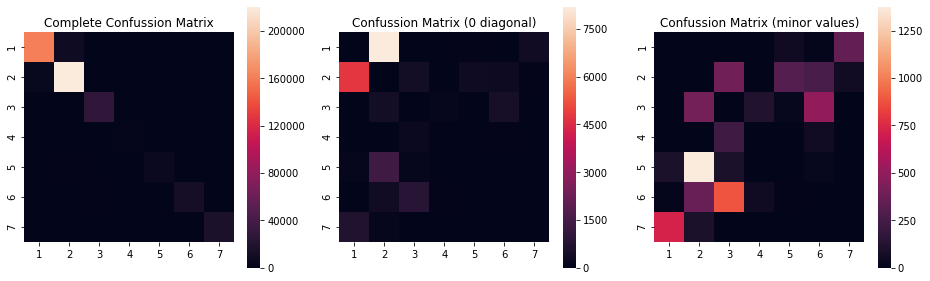

In [179]:
random_forest_7712 = RandomForestClassifier(n_estimators = 77, max_features = 12, bootstrap = True)
evaluate_model(random_forest_7712, scaled_trainData,label_data)

Confusion Matrix
[[40117  1899     1     0    10     2    88]
 [ 1040 55764   101     0    66    55    13]
 [    1    88  6825    23     7   103     0]
 [    0     0    68   471     0    12     0]
 [   16   300    20     0  1529    12     0]
 [    1    67   229    16     1  3230     0]
 [  143    22     0     0     0     0  3863]]


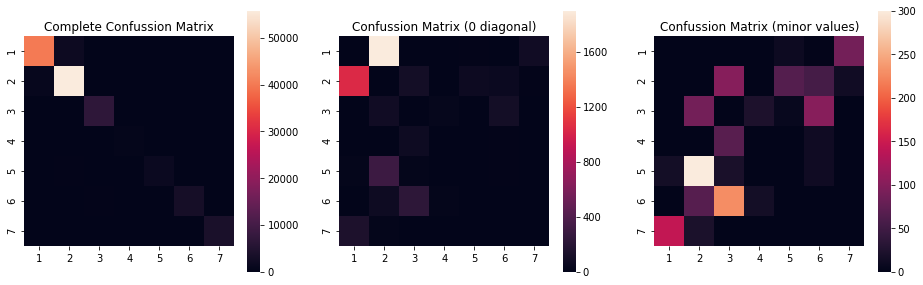

In [180]:
final_test(random_forest_7712, scaled_trainData, label_data, scaled_testData, label_dataTest)

### model 2

              precision    recall  f1-score   support

           1       0.97      0.95      0.96    169723
           2       0.96      0.98      0.97    226262
           3       0.95      0.97      0.96     28707
           4       0.92      0.87      0.89      2196
           5       0.93      0.82      0.88      7616
           6       0.94      0.92      0.93     13823
           7       0.97      0.96      0.97     16482

    accuracy                           0.96    464809
   macro avg       0.95      0.92      0.94    464809
weighted avg       0.96      0.96      0.96    464809

Confusion Matrix
[[162059   7224      5      0     61     17    357]
 [  4445 220799    369      2    343    246     58]
 [     3    351  27729    115     28    481      0]
 [     0      0    232   1908      0     56      0]
 [    90   1136     85      0   6276     29      0]
 [    12    296    758     55     10  12692      0]
 [   634     90      0      0      1      0  15757]]


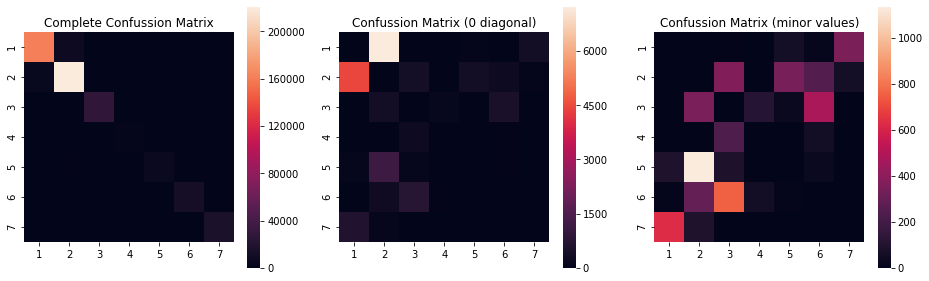

In [181]:
random_forest_16610 = RandomForestClassifier(n_estimators = 166, max_features = 10, bootstrap = False)
evaluate_model(random_forest_16610, scaled_trainData,label_data)

Confusion Matrix
[[40330  1691     0     0    12     2    82]
 [ 1000 55807    90     0    76    50    16]
 [    1    72  6837    26     7   104     0]
 [    0     0    59   480     0    12     0]
 [   15   264    19     0  1567    12     0]
 [    1    63   190    15     1  3274     0]
 [  136    17     0     0     1     0  3874]]


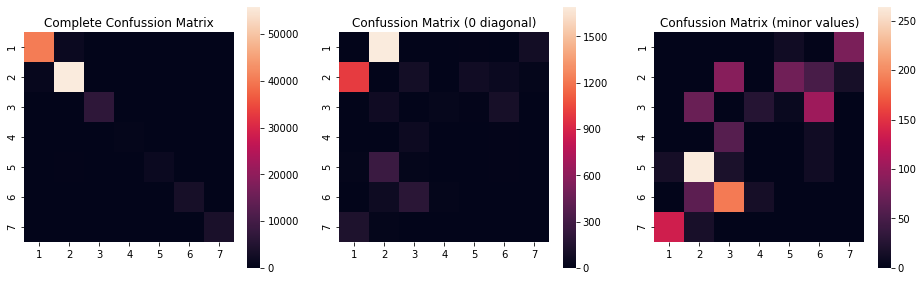

In [182]:
final_test(random_forest_16610, scaled_trainData, label_data, scaled_testData, label_dataTest)

From the results first is necessary to explain why I plot 3 heatmaps for the confusion matrix, as mentioned before exists a lot of examples for cover types 1 and 2 therefore this is reflected on the predictions. The heatmaps are scaled according to the maximum and minimum values for this reason its necessary to 'delete' the bigger values with the purpose of see the behaviour of the other predictions.

The behaviour of the cross validation and the simple test are very similar having the same distribution of the predictions in both models, since the amount of type 1 and 2 covers are the majority of the dataset also have a lot of wrong predictions, in all the proves the model predicts the type 1 as 2 and the type 2 as 1, this is a reasonable error looking the histograms presented before this two cover types are similar in their distributions, the other wrong predictions are minimum comparing with the amount of data. Finally the two set of hyperparameters have similar results on the predictions and the f1 score so picking one above the other doesnt affect so much the final response only affect the time and computational resourses needed it to fit the data.


